#Introduction

.....


Check to see if jupyter lab uses the correct python interpreter with '!which python'.
It should be something like '/opt/anaconda3/envs/[environment name]/bin/python' (on Mac).
If not, try this: https://github.com/jupyter/notebook/issues/3146#issuecomment-352718675

In [8]:
!which python

'which' is not recognized as an internal or external command,
operable program or batch file.


In [9]:
!python --version

Python 3.6.12 :: Anaconda, Inc.


# Install dependencies:

In [10]:
install_packages = True
if install_packages:
    !conda install tensorflow=2 -y
    !conda install -c anaconda pandas -y
    !conda install -c conda-forge tensorflow-hub -y
    !conda install -c akode html2text -y
    !conda install -c conda-forge tqdm -y
    !conda install -c anaconda scikit-learn -y
    !conda install -c conda-forge matplotlib -y
    !conda install -c anaconda seaborn -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Ira\anaconda3\envs\csma

  added / updated specs:
    - tensorflow=2


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.10.14 |                0         122 KB
    openssl-1.1.1h             |       he774522_0         4.8 MB
    ------------------------------------------------------------
                                           Total:         5.0 MB

The following packages will be UPDATED:

  certifi                anaconda::certifi-2020.6.20-py36_0 --> pkgs/main::certifi-2020.11.8-py36haa95532_0

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates                                  anaconda --> pkgs/main
  openssl                                          anaconda --> pkgs/main




ca-certificates-2020 | 122 KB    |            |   0% 
c

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(139): Could not remove or rename C:\Users\Ira\anaconda3\pkgs\openssl-1.1.1h-he774522_0\Library\bin\libssl-1_1-x64.dll.conda_trash.conda_trash.conda_trash.conda_trash.conda_trash.conda_trash.conda_trash.conda_trash.conda_trash.conda_trash.conda_trash.conda_trash.conda_trash.conda_trash.  Please remove this file manually (you may need to reboot to free file handles)


# Imports

In [11]:
#imports
import pandas as pd
import numpy as np
import os
import time
import tensorflow as tf
import tensorflow_hub as hub
import zipfile
from html2text import HTML2Text
from tqdm import tqdm
import re
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import seaborn as sns

# Set pandas print options
This will improve readability of printed pandas dataframe.


In [12]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Set global Parameters
Set your parameters here:

data_path: In this path put the data you have downloaded with YouTube Data Tools. 
output_path: Tghe files generated in this notebook will be saved here.

url_dict: URLs to models on Tensorflow hub are saved here. Other models are available there.
model_type: Define which model you would like to use. Choose one from url_dict

new_embeddings: If this is true, new embeddings will be generated and saved at output_path. Otherwise, embeddings are loaded from Disc.




In [17]:
data_path = './data/videoinfo_sMLnu2BQwzM_2020_11_29-22_12_29_comments.tab'
output_path = "./output/"

new_embeddings = True

url_dict = {
            'Transformer' : "https://tfhub.dev/google/universal-sentence-encoder-large/5",
            'DAN' : "https://tfhub.dev/google/universal-sentence-encoder/4",
            'Transformer_Multilingual': "https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3"
}

model_type = 'Transformer' #@param ['DAN','Transformer','Transformer_Multilingual']

## Create output directory
Try to create the directory defined by output_path

In [18]:
try:
   os.mkdir(output_path)
except OSError:
  print ("Creation of the directory %s failed" % output_path)
else:
  print ("Successfully created the directory %s " % output_path)


Successfully created the directory ./output/ 


# Load Data
Load you data as a pandas dataframe

In [20]:
if new_embeddings:
    data = pd.read_csv(data_path,sep='\t',header=(0))
    data.head()

# Preprocessing
Preprocess your data:
- Drop empty rows
- Drop unused columns

In [21]:
if new_embeddings:
    data = data.dropna(subset=['text', 'authorName']) # drop rows with no content
    data=data.drop(['id', 'replyCount','likeCount','authorChannelUrl','authorChannelId','isReplyTo','isReplyToName'],axis=1) # drop unused columns
    data.head()

- remove HTML-tags, links and usernames

In [22]:
if new_embeddings:
    # Remove HTML tags
    tqdm.pandas()
    h = HTML2Text()
    h.ignore_links = True
    data['cleaned'] = data['text'].progress_apply(lambda x: h.handle(x))
    print( "Removed HTML Tags.")

    # Remove links
    http_link_pattern = r'http\S+'
    bitly_link_pattern = r'bit.ly/\S+'
    data['cleaned'] = data['cleaned'].str.replace(http_link_pattern, '')
    data['cleaned'] = data['cleaned'].str.replace(bitly_link_pattern, '')
    print( "Removed Links.")

    # Remove user names
    keep_names = ["earth", "Tide", "Geologist", "A Person", "Titanic", "adventure", "Sun", "The United States Of America"] # user names we want to keep
    user_names = [name for name in data['authorName'].unique() if (len(name)> 3 and name not in keep_names)]
    data['cleaned'] = data['cleaned'].str.replace('|'.join(map(re.escape, user_names)), '')
    print( "Removed user names.")

100%|████████████████████████████████████████████████████████████████████████████| 1231/1231 [00:00<00:00, 4207.50it/s]


Removed HTML Tags.
Removed Links.
Removed user names.


# Save or Load preprocessed data

Save your data afte preprocessing, or load preprocessed data from disc.

In [23]:
if new_embeddings:
  data.to_pickle(output_path+'data_preprocessed'+'.pkl')
else:
  data = pd.read_pickle(output_path+'data_preprocessed'+'.pkl')
data.head()

,publishedAt,authorName,text,isReply,cleaned
0,2020-11-28 06:13:43,Anugreh Kaul,"<a href=""https://www.youtube.com/watch?v=sMLnu2BQwzM&amp;t=5m56s"">5:56</a> <b>cough cough..candance...cough cough...owens</b>",0,5:56 **cough cough..candance...cough cough...owens**\n\n
1,2020-11-20 06:54:05,Justin,"First, prove AND demonstrate, beyond a shadow of a doubt, that climate change is caused solely by man and not just apart of the normal heating and cooling cycles of the Earth. <br />Second, maybe The Right would listen to The Left if they weren&#39;t constantly being hyperbolic, claiming the world is going to die in xx years. <br />Third, wouldn&#39;t it make more sense for humans to adapt to a changing environment than try to change the whole fucking planet to suit you?",0,"First, prove AND demonstrate, beyond a shadow of a doubt, that climate change\nis caused solely by man and not just apart of the normal heating and cooling\ncycles of the Earth. \nSecond, maybe The Right would listen to The Left if they weren't constantly\nbeing hyperbolic, claiming the world is going to die in xx years. \nThird, wouldn't it make more sense for humans to adapt to a changing\nenvironment than try to change the whole fucking planet to suit you?\n\n"
2,2020-11-16 21:06:58,Mr Marvelous & the Unicorn.,Hydro electric dams cause climate change. Consider all the mineral rich water that never reaches the sea.,0,Hydro electric dams cause climate change. Consider all the mineral rich water\nthat never reaches the sea.\n\n
3,2020-11-16 09:36:41,Ахова птушак Бацькаўшчыны,"Here you can watch a lecture on climate change by Dr Rob Field <a href=""https://youtu.be/EGmdDh3A-lc"">https://youtu.be/EGmdDh3A-lc</a>",0,Here you can watch a lecture on climate change by Dr Rob Field\n\n\n
4,2020-11-15 01:46:10,Cyphlix,Climate truthers base their worldview on ignorance and groupthink rather than science.,0,Climate truthers base their worldview on ignorance and groupthink rather than\nscience.\n\n


# Produce Text Embeddings with Universal Sentence Encoder

## Load Model
Load the model from TF-hub

In [24]:
hub_url = url_dict[model_type]
if new_embeddings:
  print("Loading model. This will take some time...")
  embed = hub.load(hub_url)

Loading model. This will take some time...


## Embed Documents
Produce embeddings of your documents.

In [25]:
if new_embeddings:
    for k,g in data.groupby(np.arange(len(data))//200):
        if k == 0:
            embeddings = embed(g['cleaned'])
        else:
            embeddings_new = embed(g['cleaned'])
            embeddings = tf.concat(values=[embeddings,embeddings_new],axis = 0)
            print(k , end =" ")
    print("The embeddings vector is of fixed length {}".format(embeddings.shape[1]))

    np.save(output_path+'/embeddings'+model_type+'.npy', embeddings, allow_pickle=True, fix_imports=True)
else:
    embeddings = np.load(output_path+'/embeddings'+model_type+'.npy', mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')

embeddings.shape

1 2 3 4 5 6 The embeddings vector is of fixed length 512


TensorShape([1231, 512])

## Calculate Similarity Matrix with angular distance

'Following Cer et al. (2018), we first compute
the sentence embeddings u, v for an STS sentence
pair, and then score the sentence pair similarity
based on the angular distance between the two
embedding vectors  d = − arccos (uv/||u|| ||v||).'

In [26]:
from sklearn.metrics.pairwise import cosine_similarity
def cos_sim(input_vectors):
    similarity = cosine_similarity(input_vectors)
    return similarity
cosine_similarity_matrix = cos_sim(np.array(embeddings))
print(cosine_similarity_matrix)

[[ 1.0000001  -0.02640833  0.02684269 ...  0.04611875  0.10051684
   0.10051683]
 [-0.02640833  1.0000004   0.3212615  ... -0.0120322   0.03485531
   0.03485529]
 [ 0.02684269  0.3212615   0.9999999  ... -0.05597638  0.10592273
   0.10592273]
 ...
 [ 0.04611875 -0.0120322  -0.05597638 ...  1.          0.34124535
   0.3412453 ]
 [ 0.10051684  0.03485531  0.10592273 ...  0.34124535  1.0000001
   1.0000001 ]
 [ 0.10051683  0.03485529  0.10592273 ...  0.3412453   1.0000001
   1.        ]]


# Plots Similarity 
Plot and print a heat map showing the semantic contextual similarity between comments.

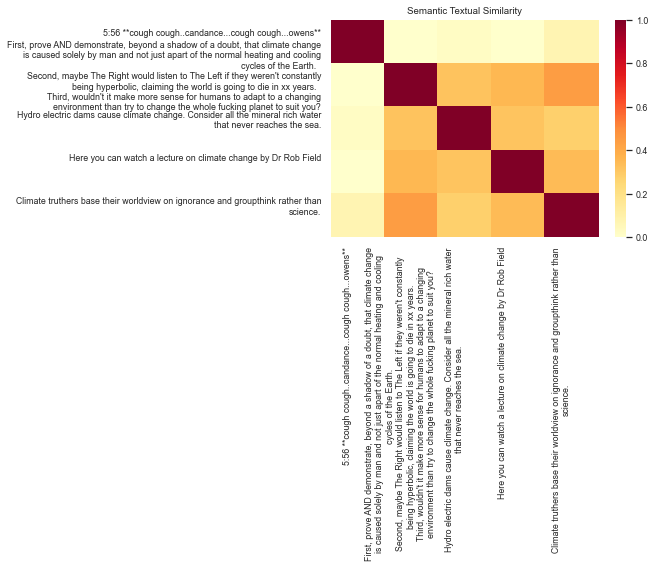

In [34]:
import seaborn as sns
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=0.8) #1.2
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

num_samples = 5
off_set = 0 #10000

plot_similarity(data.iloc[off_set:off_set+num_samples]['cleaned'], embeddings[off_set:off_set+num_samples], 90)

# Show neighbours of a comment 
Define which comment to analyze

In [51]:
comment_index = 567 #333 #222 #324
comment = data["cleaned"][comment_index]
comment_list = data["cleaned"].tolist()
print(comment)

CO2 is totally misrepresented as it always is. carbon dioxide is the most
prevalent element in the atmosphere and every life form on this planet cannot
survive without carbon. The concentration of carbon dioxide on its own is not
quote-unquote plantfood or fertilizer it's the air that we breathe we exhale
it every single time we inhale oxygen it is the process of life that we engage
in if you don't understand that it is not a pollutant




Print similar comments.

In [52]:
def get_top_similar(sentence, sentence_list, similarity_matrix, topN):
    # find the index of sentence in list
    index = sentence_list.index(sentence)
    # get the corresponding row in similarity matrix
    similarity_row = np.array(similarity_matrix[index, :])
    # get the indices of top similar
    indices = similarity_row.argsort()[-topN:][::-1]
    return [sentence_list[i] for i in indices]


for i, value in enumerate(get_top_similar(comment, comment_list, cosine_similarity_matrix, 20)):
  print("Top similar comment {}: {}".format(i+1, value))

Top similar comment 1: CO2 is totally misrepresented as it always is. carbon dioxide is the most
prevalent element in the atmosphere and every life form on this planet cannot
survive without carbon. The concentration of carbon dioxide on its own is not
quote-unquote plantfood or fertilizer it's the air that we breathe we exhale
it every single time we inhale oxygen it is the process of life that we engage
in if you don't understand that it is not a pollutant


Top similar comment 2: CO2 isn't a 'plant fertilizer' you dumb witch, it's what plants breathe and
they give off oxygen. She has a lack of basic plant biology and science,
google it (photosynthesis).


Top similar comment 3: Ahh yes of course, CO2 the gas of life that's poisonous to the climate or
something. Yawn.


Top similar comment 4: It is a fact that CO2 has dropped through out the Earth history. Look up the
carbon cycle to see how this is happening. But we and everything on this Earth
right now have evolved to live with th